こちらのノートブックは
【機械学習初心者向け】クラスタリング手法「k-means」について解説という記事より

「k-meansをPythonで実装してみよう」で使用したコードとなります。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("summary_by_prefecture.csv", encoding="shift-jis")
# 文字コードエラー回避のためshift-jisを使用しています
# 政府CIOポータルがオープンデータで配布している「都道府県別累積接種回数サマリー」を使用しておりダウンロード日によって違う結果となる場合もあります

In [3]:
df.head()

,date,prefecture_code,prefecture_name,count_first_or_mid_general,count_second_or_full_general
0,2021-07-29,1,北海道,1780534,1182624
1,2021-07-29,2,青森県,456292,320672
2,2021-07-29,3,岩手県,418846,271436
3,2021-07-29,4,宮城県,760437,524925
4,2021-07-29,5,秋田県,366317,282013


In [4]:
df.dtypes

date                            object
prefecture_code                  int64
prefecture_name                 object
count_first_or_mid_general       int64
count_second_or_full_general     int64
dtype: object

In [5]:
df.isnull().sum()

date                            0
prefecture_code                 0
prefecture_name                 0
count_first_or_mid_general      0
count_second_or_full_general    0
dtype: int64

In [6]:
df["wait_for_second"] = df["count_first_or_mid_general"] - df["count_second_or_full_general"]
X = df[["count_first_or_mid_general", "wait_for_second"]]

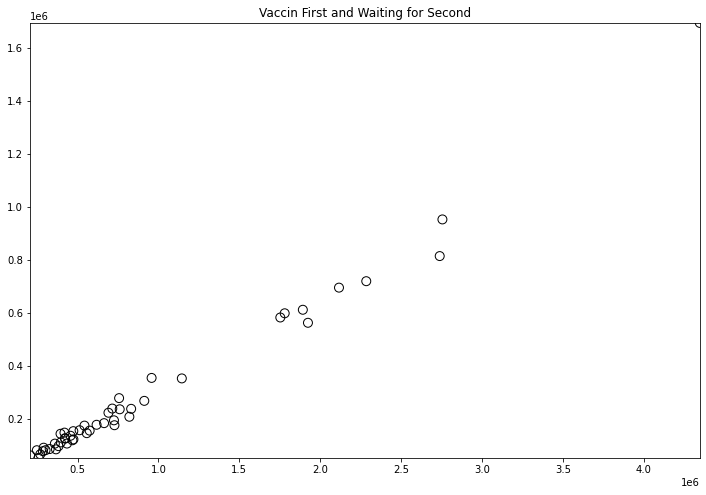

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(X["count_first_or_mid_general"], X["wait_for_second"],marker="o", facecolor="none",
           edgecolors="black", s=80)
x_min, x_max = X["count_first_or_mid_general"].min(), X["count_first_or_mid_general"].max()
y_min, y_max = X["wait_for_second"].min(), X["wait_for_second"].max()
plt.title("Vaccin First and Waiting for Second")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

In [8]:
kmeans = KMeans(n_clusters=3,n_init=10)
#クラスタ数は3、アルゴリズムを10回実行

In [9]:
result = kmeans.fit(X)

In [10]:
output = kmeans.predict(X)

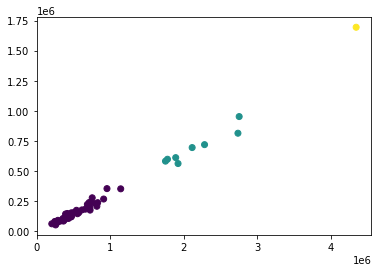

In [11]:
plt.scatter(X["count_first_or_mid_general"], X["wait_for_second"], c=result.labels_)
plt.show()

In [12]:
df[df["count_first_or_mid_general"] > 4000000]["prefecture_name"]

12    東京都
Name: prefecture_name, dtype: object